# K-means Clustering Lab

**Objective**: *Apply K-means clustering to a dataset to learn more about how the records are related to one another.*

we will create a user-level table with the following columns:

1. `avg_resting_heartrate` – the average resting heartrate
1. `avg_active_heartrate` - the average active heartrate
1. `avg_bmi` – the average BMI
1. `avg_vo2` - the average oxygen volume
1. `sum_workout_minutes` - the sum of total workout minutes
1. `sum_steps` - the sum of total steps

In [0]:
%sql
select * from adsda.ht_daily_metrics

device_id,dte,resting_heartrate,active_heartrate,bmi,vo2,workout_minutes,lifestyle,steps
01c99836-e48b-11ea-8204-0242ac110002,2019-01-01,84.21990807741808,122.36614513322988,24.001442078098176,23.520174244131812,55.290771176379415,Athlete,10345
01c99836-e48b-11ea-8204-0242ac110002,2019-01-02,75.56009664616255,132.08213570805194,23.981473224271443,23.241395323502907,27.99672176043603,Athlete,9140
01c99836-e48b-11ea-8204-0242ac110002,2019-01-03,67.95214658754116,133.897419834453,24.01203323166733,23.844758959223647,6.403982740621206,Athlete,8895
01c99836-e48b-11ea-8204-0242ac110002,2019-01-04,72.07402249362427,130.27996931348147,24.184537499965806,23.65815389509837,21.06190942499232,Athlete,10683
01c99836-e48b-11ea-8204-0242ac110002,2019-01-05,84.21089219223238,130.45737338095134,24.504363282462865,23.930176012952693,11.171669668342071,Athlete,8752
01c99836-e48b-11ea-8204-0242ac110002,2019-01-06,75.658933279154,136.26823209734053,24.880787811951734,23.515016511789092,36.322123198181856,Athlete,8581
01c99836-e48b-11ea-8204-0242ac110002,2019-01-07,77.54221509394144,127.33802451540777,23.662747181933334,23.267727721229672,23.757184390043182,Athlete,6388
01c99836-e48b-11ea-8204-0242ac110002,2019-01-08,81.40364010506734,129.20986100613382,22.781450746703168,23.717085048542415,0.0,Athlete,6723
01c99836-e48b-11ea-8204-0242ac110002,2019-01-09,81.41987677503842,124.09827579356201,24.947920304321936,23.765823077235936,37.33242567311174,Athlete,9057
01c99836-e48b-11ea-8204-0242ac110002,2019-01-10,82.25271399068558,117.5871148531541,23.97351606107311,23.605851911587216,34.86683134450769,Athlete,11495


In [0]:
%sql
drop database FARDIN

com.databricks.backend.common.rpc.DatabricksExceptions$SQLExecutionException: org.apache.spark.sql.AnalysisException: org.apache.hadoop.hive.metastore.api.NoSuchObjectException: There is no database named fardin;
	at org.apache.spark.sql.hive.HiveExternalCatalog.$anonfun$withClient$2(HiveExternalCatalog.scala:159)
	at org.apache.spark.sql.hive.HiveExternalCatalog.maybeSynchronized(HiveExternalCatalog.scala:110)
	at org.apache.spark.sql.hive.HiveExternalCatalog.$anonfun$withClient$1(HiveExternalCatalog.scala:148)
	at com.databricks.backend.daemon.driver.ProgressReporter$.withStatusCode(ProgressReporter.scala:377)
	at com.databricks.backend.daemon.driver.ProgressReporter$.withStatusCode(ProgressReporter.scala:363)
	at com.databricks.spark.util.SparkDatabricksProgressReporter$.withStatusCode(ProgressReporter.scala:34)
	at org.apache.spark.sql.hive.HiveExternalCatalog.withClient(HiveExternalCatalog.scala:147)
	at org.apache.spark.sql.hive.HiveExternalCatalog.dropDatabase(HiveExternalCatalog.scala:263)
	at org.apache.spark.sql.catalyst.catalog.ExternalCatalogWithListener.dropDatabase(ExternalCatalogWithListener.scala:58)
	at org.apache.spark.sql.catalyst.catalog.SessionCatalog.dropDatabase(SessionCatalog.scala:260)
	at org.apache.spark.sql.execution.command.DropDatabaseCommand.run(ddl.scala:113)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult$lzycompute(commands.scala:70)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.sideEffectResult(commands.scala:68)
	at org.apache.spark.sql.execution.command.ExecutedCommandExec.executeCollect(commands.scala:79)
	at org.apache.spark.sql.Dataset.$anonfun$logicalPlan$1(Dataset.scala:234)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3757)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withCustomExecutionEnv$5(SQLExecution.scala:116)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:248)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withCustomExecutionEnv$1(SQLExecution.scala:101)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:841)
	at org.apache.spark.sql.execution.SQLExecution$.withCustomExecutionEnv(SQLExecution.scala:77)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:198)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3755)
	at org.apache.spark.sql.Dataset. (Dataset.scala:234)
	at org.apache.spark.sql.Dataset$.$anonfun$ofRows$2(Dataset.scala:104)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:841)
	at org.apache.spark.sql.Dataset$.ofRows(Dataset.scala:101)
	at org.apache.spark.sql.SparkSession.$anonfun$sql$1(SparkSession.scala:676)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:841)
	at org.apache.spark.sql.SparkSession.sql(SparkSession.scala:671)
	at org.apache.spark.sql.SQLContext.sql(SQLContext.scala:672)
	at com.databricks.backend.daemon.driver.SQLDriverLocal.$anonfun$executeSql$1(SQLDriverLocal.scala:91)
	at scala.collection.TraversableLike.$anonfun$map$1(TraversableLike.scala:238)
	at scala.collection.immutable.List.foreach(List.scala:392)
	at scala.collection.TraversableLike.map(TraversableLike.scala:238)
	at scala.collection.TraversableLike.map$(TraversableLike.scala:231)
	at scala.collection.immutable.List.map(List.scala:298)
	at com.databricks.backend.daemon.driver.SQLDriverLocal.executeSql(SQLDriverLocal.scala:37)
	at com.databricks.backend.daemon.driver.SQLDriverLocal.repl(SQLDriverLocal.scala:144)
	at com.databricks.backend.daemon.driver.DriverLocal.$anonfun$execute$10(DriverLocal.scala:431)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:239)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:234)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:231)
	at com.datab

In [0]:
%sql
-- TODO
CREATE OR REPLACE TABLE fardin.ht_user_metrics_lab
USING DELTA LOCATION "/fardin/ht-user-metrics-lab" AS (
  SELECT avg(resting_heartrate) AS avg_resting_heartrate,
         avg(active_heartrate) AS avg_active_heartrate,
         avg(bmi) AS avg_bmi,
         avg(vo2) AS avg_vo2,
         sum(workout_minutes) AS sum_workout_minutes,
         sum(steps) AS sum_steps
  FROM adsda.ht_daily_metrics
  GROUP BY device_id
)

com.databricks.backend.common.rpc.DatabricksExceptions$SQLExecutionException: org.apache.spark.sql.catalyst.analysis.NoSuchDatabaseException: Database 'fardin' not found;
	at org.apache.spark.sql.catalyst.catalog.SessionCatalog.requireDbExists(SessionCatalog.scala:212)
	at org.apache.spark.sql.catalyst.catalog.SessionCatalog.createTable(SessionCatalog.scala:366)
	at com.databricks.sql.DatabricksSessionCatalog.createTable(DatabricksSessionCatalog.scala:201)
	at com.databricks.sql.transaction.tahoe.commands.CreateDeltaTableCommand.updateCatalog(CreateDeltaTableCommand.scala:362)
	at com.databricks.sql.transaction.tahoe.commands.CreateDeltaTableCommand.$anonfun$run$2(CreateDeltaTableCommand.scala:218)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$4(UsageLogging.scala:431)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:239)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:234)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:231)
	at com.databricks.spark.util.PublicDBLogging.withAttributionContext(DatabricksSparkUsageLogger.scala:18)
	at com.databricks.logging.UsageLogging.withAttributionTags(UsageLogging.scala:276)
	at com.databricks.logging.UsageLogging.withAttributionTags$(UsageLogging.scala:269)
	at com.databricks.spark.util.PublicDBLogging.withAttributionTags(DatabricksSparkUsageLogger.scala:18)
	at com.databricks.logging.UsageLogging.recordOperation(UsageLogging.scala:412)
	at com.databricks.logging.UsageLogging.recordOperation$(UsageLogging.scala:338)
	at com.databricks.spark.util.PublicDBLogging.recordOperation(DatabricksSparkUsageLogger.scala:18)
	at com.databricks.spark.util.PublicDBLogging.recordOperation0(DatabricksSparkUsageLogger.scala:55)
	at com.databricks.spark.util.DatabricksSparkUsageLogger.recordOperation(DatabricksSparkUsageLogger.scala:98)
	at com.databricks.spark.util.UsageLogger.recordOperation(UsageLogger.scala:71)
	at com.databricks.spark.util.UsageLogger.recordOperation$(UsageLogger.scala:58)
	at com.databricks.spark.util.DatabricksSparkUsageLogger.recordOperation(DatabricksSparkUsageLogger.scala:67)
	at com.databricks.spark.util.UsageLogging.recordOperation(UsageLogger.scala:346)
	at com.databricks.spark.util.UsageLogging.recordOperation$(UsageLogger.scala:325)
	at com.databricks.sql.transaction.tahoe.commands.CreateDeltaTableCommand.recordOperation(CreateDeltaTableCommand.scala:48)
	at com.databricks.sql.transaction.tahoe.metering.DeltaLogging.recordDeltaOperation(DeltaLogging.scala:108)
	at com.databricks.sql.transaction.tahoe.metering.DeltaLogging.recordDeltaOperation$(DeltaLogging.scala:94)
	at com.databricks.sql.transaction.tahoe.commands.CreateDeltaTableCommand.recordDeltaOperation(CreateDeltaTableCommand.scala:48)
	at com.databricks.sql.transaction.tahoe.commands.CreateDeltaTableCommand.run(CreateDeltaTableCommand.scala:101)
	at com.databricks.sql.transaction.tahoe.catalog.DeltaCatalog.com$databricks$sql$transaction$tahoe$catalog$DeltaCatalog$$createDeltaTable(DeltaCatalog.scala:144)
	at com.databricks.sql.transaction.tahoe.catalog.DeltaCatalog$StagedDeltaTableV2.commitStagedChanges(DeltaCatalog.scala:338)
	at org.apache.spark.sql.execution.datasources.v2.AtomicTableWriteExec.$anonfun$writeToStagedTable$1(WriteToDataSourceV2Exec.scala:502)
	at org.apache.spark.util.Utils$.tryWithSafeFinallyAndFailureCallbacks(Utils.scala:1615)
	at org.apache.spark.sql.execution.datasources.v2.AtomicTableWriteExec.writeToStagedTable(WriteToDataSourceV2Exec.scala:489)
	at org.apache.spark.sql.execution.datasources.v2.AtomicTableWriteExec.writeToStagedTable$(WriteToDataSourceV2Exec.scala:485)
	at org.apache.spark.sql.execution.datasources.v2.AtomicReplaceTableAsSelectExec.writeToStagedTable(WriteToDataSourceV2Exec.scala:218)
	at org.apache.spark.sql.execution.datasources.v2.AtomicReplaceTableAsSelectExec.run(WriteToDataS

In [0]:
df = spark.table("adsda.ht_user_metrics_lab").toPandas()
df.shape

Out[6]: (3000, 6)

-sandbox

we will split the data into an training set and an inference set.

In [0]:
# TODO
from sklearn.model_selection import train_test_split

train_df, inference_df = train_test_split(df, train_size=0.85, test_size=0.15, random_state=42)

In [0]:
print(f"{train_df.shape[0]} and {inference_df.shape[0]}")

2550 and 450

we will identify the optimal number of clusters for K-means using the training set.

In [0]:
# TODO
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

distortions = []
values_of_k = range(2, 16)

for k in values_of_k:
  k_means = KMeans(n_clusters=k, max_iter=500)
  k_means.fit(scale(train_df))
  distortion = k_means.score(scale(train_df))
  distortions.append(-distortion)

In [0]:
list(zip(distortions, values_of_k))

Out[10]: [(7768.918864112347, 2),
 (5745.051807668533, 3),
 (4443.621447143515, 4),
 (3730.5861301752702, 5),
 (3292.6914461810657, 6),
 (2976.3391124548752, 7),
 (2682.0253738819465, 8),
 (2455.3317821340534, 9),
 (2242.468857792078, 10),
 (2063.92922973421, 11),
 (1933.8871243045473, 12),
 (1829.1131850671486, 13),
 (1719.690119657932, 14),
 (1619.2168783634288, 15)]

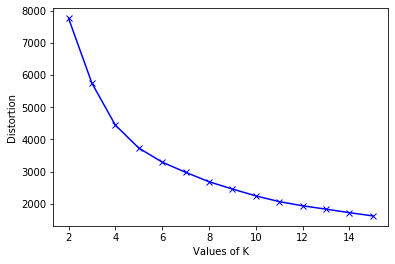

In [0]:
import matplotlib.pyplot as plt

plt.plot(values_of_k, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.show()

retrain the model with the optimal number of clusters.

In [0]:
# TODO
k_means = KMeans(n_clusters=6, max_iter=500, random_state=1234)
k_means.fit(scale(train_df))

Out[26]: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
 n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
 random_state=1234, tol=0.0001, verbose=0)

In [0]:
# TODO
k_means.cluster_centers_

Out[24]: array([[ 0.275374 , 0.57021413, 1.3698731 , -0.40817049, -0.06287903,
 -0.64544811],
 [-0.90543429, -1.00414376, -0.29412489, 1.09934623, -0.01109405,
 0.87801928],
 [ 1.61025512, 1.05029403, -0.17259382, -1.45224165, 0.41986857,
 -0.93146253],
 [-0.27601119, -0.08047006, 0.40179222, 0.19577942, 0.13818941,
 0.1646925 ],
 [-0.77845923, -0.73416512, -1.35797601, 0.50630492, 1.08659208,
 0.96616796],
 [ 1.35621638, 1.42608208, 0.16869715, -1.24047146, -2.37881258,
 -1.68873145]])

In [0]:
# TODO
inference_df_clusters = k_means.predict(scale(inference_df))
clusters_df = inference_df.copy()
clusters_df["cluster"] = inference_df_clusters

In [0]:
clusters_df

Out[29]:

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,sum_workout_minutes,sum_steps,cluster
1801,51.266328,105.932334,16.473337,36.617985,14856.962930,5149253.0,4
1190,53.369499,105.133427,15.266639,30.501973,22529.034330,4572814.0,4
1817,86.511629,147.315731,19.148256,19.448407,16425.031576,2649058.0,2
251,62.678328,126.550708,28.538456,30.136316,13255.053310,3766824.0,0
2505,78.384312,144.530443,23.844877,26.163978,1976.135067,1884119.0,5
...,...,...,...,...,...,...,...
366,63.821888,113.530556,28.914647,30.644597,9850.104777,4316436.0,3
2024,72.503268,157.831395,27.794532,27.678000,12685.824135,2543617.0,0
2897,87.760889,152.707746,20.670263,20.488716,15607.446761,2658577.0,2
29,57.899302,107.847039,23.994824,34.514037,14371.374257,3864753.0,3


In [0]:
clusters_df["cluster"].value_counts()

Out[28]: 1 108
3 86
4 78
0 75
2 58
5 45
Name: cluster, dtype: int64

In [0]:
clusters_df['cluster'].value_counts()

Out[30]: 1 108
3 86
4 78
0 75
2 58
5 45
Name: cluster, dtype: int64

In [0]:
clusters_df.groupby(["cluster"])[["sum_steps"]].mean()

Out[33]:

,sum_steps
cluster,
0,3.038806e+06
1,4.676252e+06
2,2.715881e+06
3,3.848814e+06
4,4.887177e+06
5,1.886940e+06


In [0]:
clusters_df.groupby(["cluster"])[['sum_steps']].mean()

Out[41]:

,sum_steps
cluster,
0,3.038806e+06
1,4.676252e+06
2,2.715881e+06
3,3.848814e+06
4,4.887177e+06
5,1.886940e+06


In [0]:
cluster_sparkdf = spark.createDataFrame(clusters_df)

In [0]:
cluster_sparkdf.write.format("delta").mode("overwrite").save("/adsda/cluster_sparkdf")

In [0]:
%sql
drop table if exists adsda.cluster_sparkdf;
create table if not exists adsda.cluster_sparkdf
using delta location "/adsda/cluster_sparkdf"

In [0]:
%sql
select * from adsda.cluster_sparkdf

avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,sum_workout_minutes,sum_steps,cluster
49.11901153345213,94.11161283710865,25.35220249892249,43.99386448757189,11155.348982569963,4605581.0,1
81.40604329073291,149.3810416598289,22.738234950600113,23.323575119834672,14280.177652004568,2624986.0,2
49.9655406080858,91.93795133266622,22.377484105782035,38.988483421115994,11831.347630062484,4707630.0,1
67.88324062836111,149.1955005599329,26.109059949925353,28.51200950188655,1932.5315246446135,1871227.0,5
72.32711709740582,133.59346076607423,26.8969538475919,26.884475005033227,13633.639393125595,3770950.0,0
52.08242558066806,97.6247590126588,15.963914541388197,35.120605206122065,15046.697392800435,5269715.0,4
49.15093376304447,99.49354606683502,22.26278425864848,42.866347413753125,17376.17476954037,4123135.0,1
51.64529114066801,109.45450482061065,17.251863314063794,34.89407216202003,21077.596277995628,4475567.0,4
78.27038443823953,127.1257962355488,25.793246138523223,22.105290510689294,13303.253265725934,2600015.0,2
66.36368740865393,128.4863791487508,29.41394032135642,29.732989915627993,12444.68212628725,3757035.0,0


In [0]:
%sql
select cluster,int(avg(sum_steps)) from adsda.cluster_sparkdf group by cluster

cluster,CAST(avg(sum_steps) AS INT)
1,4676251
3,3848814
5,1886940
4,4887176
2,2715881
0,3038805
